In [83]:
using Distributions,SpecialFunctions,Random,Plots,StatsPlots

Q1 

We need show that the distirbution of that the algorithmn is Bern($\frac{c_yp_y}{c_xp_x+c_yp_y}$).$\newline$
If we show that the algorithmn outputs 1 with probability $\frac{c_yp_y}{c_xp_x+c_yp_y}$ then we are done.
Suppose before returning $1$, we went to line 1, $a$ times after reaching line 7 and  $b$ times after reaching line 13. So to get the total probability $p$, we need to sum over all possible combinations of $a$ and $b$. So, we have,$\\$
$$p= \frac{p_yc_y}{c_x+c_y}\sum_{a=0}^{\infty} \sum_{b=0}^{\infty} {{a+b} \choose b} \Big(\frac{c_y(1-p_y)}{c_x+c_y}\Big)^a \Big(\frac{c_x(1-p_x)}{c_x+c_y}\Big)^b \\$$
$$\implies p = \frac{p_yc_y}{c_x+c_y}\sum_{a=0}^{\infty} \Big(\frac{c_y(1-p_y)}{c_x+c_y}\Big)^a \sum_{b=0}^{\infty} {{a+b} \choose b}  \Big(\frac{c_x(1-p_x)}{c_x+c_y}\Big)^b \\$$
We know that $\\$
$$\sum_{k=0}^{\infty} {{n+k} \choose k} x^k = \frac{1}{(1-x)^{n+1}}$$
Therefore:-$\\$
$$\implies p= \frac{p_yc_y}{p_xc_x+c_y}\sum_{a=0}^{\infty} \Big(\frac{c_y(1-p_y)}{p_xc_x+c_y}\Big)^a = \frac{c_yp_y}{p_xc_x + p_yc_y}\\$$
Hence Proved.


Here we are Implementing the Algorithmn using binomial probabilities

In [15]:
loops = []
function bern(x,y,c_x,c_y)
    
    accept = 1
    iter = 0
    c = c_y/(c_x + c_y)
    while accept == 1
        iter = iter + 1
        c_1 = binomial(1,C)
        
        if c == 1
            p_x = Bernoulli(x)
            c_2 = binomial(1,p_x)
            
            if c_2 == 1
                push!(loops , iter)
                return x
            end
        else
            p_y = Bernoulli(y)
            c_2 = binomial(1,p_y)
            
            if c_2 == 1
                push!(loops , iter)
                return y
            end
        end
        
    end
    
end

bern (generic function with 1 method)

Q2.

In [116]:
#Function to sample a p dimnesional a hypercube
arr=[]
function p_ar(p)
    arr=[]
    accept=0
    counter=0
    while accept==0
        counter=counter+1
        i=0
        sum=0
        for i in 1:p
            x=rand(Uniform(-1,1))
            sum=sum+x*x
            push!(arr,x)
            i=i+1
        end
        if(sum<=1)
            accept=1
        end
    end
    return (arr,counter)
end   


p_ar (generic function with 1 method)

In [117]:
#Function to return the mean iterations required to sample the hypercube
push=[]
counts=[]
function ar(p)
    counts=[]
    push=[]
    mean_count=0
    for i in 0:9999
        push=p_ar(p)
        push!(counts,push[2])
    end
    return sum(counts)/10000
    #print(counts[2])
end    
        

ar (generic function with 1 method)

In [125]:
#Calculating C (theoretical number of iterations)
function iter(p)
    return (gamma((p/2)+1)/(π^(p/2)))*(2^p)
end

iter (generic function with 1 method)

In [126]:
#Calculating for p=2
c2 = iter(2)
m2 = ar(2)
println("Iterations(c2) = " , c2)
println("Mean Iterations (p=2) = " , m2)


Iterations(c2) = 1.2732395447351628
Mean Iterations (p=2) = 1.2743


In [127]:
#Calculating for p=3

c3 = iter(3)
m3 = ar(3)
println("Iterations(c3) = " , c3)
println("Mean Iterations (p=3) = " , m3)

Iterations(c3) = 1.909859317102744
Mean Iterations (p=3) = 1.892


In [128]:
#Calculating for p=4
c4=iter(4)
m4=ar(4)
println("Iterations(c4) = " , c4)
println("Mean Iterations (p=4) = " , m4)

Iterations(c4) = 3.242277876554809
Mean Iterations (p=4) = 3.2486


In [129]:
#Calculating for p=5
c5=iter(5)
m5=ar(5)
println("Iterations(c5) = " , c5)
println("Mean Iterations (p=5) = " , m5)

Iterations(c5) = 6.0792710185402665
Mean Iterations (p=5) = 6.056


In [130]:
#Calculating for p=6
c6=iter(6)
m6=ar(6)
println("Iterations(c6) = " , c6)
println("Mean Iterations (p=6) = " , m6)

Iterations(c6) = 12.384589222348605
Mean Iterations (p=6) = 12.4303


In [131]:
#Calculating for p=10
c10=iter(10)
m10=ar(10)
println("Iterations(c10) = " , c10)
println("Mean Iterations (p=10) = " , m10)

Iterations(c10) = 401.54279645840006
Mean Iterations (p=10) = 403.3684


As p is increasing, the Number of iterations is increasing expotential and for a 10 dimensional space the number of iterations required has increased to 400 and clearly it is not a optimal method to sample 

For p=2, we are using the same algo to plot a scatter plot of the random sample

In [21]:
counts_1 = []
function circle()
    
    accept = 0
    counter = 0
    
    while accept == 0
        counter = counter + 1
        x1= rand(Uniform(-1,1))
        x2= rand(Uniform(-1,1))
        if x1*x1 + x2*x2 < 1 
            accept = 1
            push!(counts_1, counter)
            return (x1,x2)
        end
    end
end

circle (generic function with 1 method)

In [134]:
arr1 = []
x = []
y = []
for i in 1:10000
    push!(arr1 , circle())
    push!(x , arr1[i][1])
    push!(y , arr1[i][2])
end

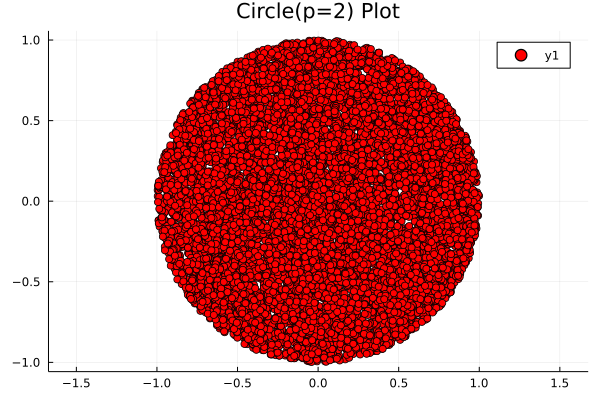

In [135]:
plot(x,y,seriestype = :scatter, title = "Circle(p=2) Plot",aspect_ratio=:equal,color="red")

Q3 CODE BEGINS HERE

In [24]:
#Using inverse transform for normal distribution
function normal_ar(a)
    accept = 0
    counter = 0
    while accept == 0
        counter = counter + 1
        u = rand(Normal(0,1))
        
        if u < a && u > -a
            accept = 1
            return (counter , u)
        end
    end
end

normal_ar (generic function with 1 method)

In [25]:
#fucntion to calculate the c for a particular a
function truncated(a)
    return  1/(cdf.(Normal(),a) - cdf.(Normal(),a*(-1)))
end

truncated (generic function with 1 method)

In [75]:
#iterating 10000 to create a sample 
arr_1 = []
arr_4 = []
sample_1 = []
sample_4 = []
for i in 0:9999
    push!(arr_1 , normal_ar(1)[1])
    push!(arr_4 , normal_ar(4)[1])
    push!(sample_1 , normal_ar(1)[2])
    push!(sample_4 , normal_ar(4)[2])
end

In [76]:
#calculating number of iterations 
a_1 = (truncated(1))
m_1 = sum(arr_1)/10000
a_4 = (truncated(4))
m_4 = sum(arr_4)/10000
println("Iterations(c) for a = 1 is    :" , a_1)
println("Mean Iterations for a = 1 is  :" , m_1)
println("Iterations(c) for a = 4 is    :" , a_4)
println("Mean Iterations for a = 4 is  :" , m_4)

Iterations(c) for a = 1 is    :1.4647947734915436
Mean Iterations for a = 1 is  :1.4619
Iterations(c) for a = 4 is    :1.0000633464961906
Mean Iterations for a = 4 is  :1.0002


So, As we increase a , the number of iterations required is going less, which is expected as sample from more support of normal can be taken up

In [77]:
#calculating sample variance
println("Observed Variance for a = 1 is: ",var(sample_1))
println("Calculated Variance for a = 1 is: ",var(TruncatedNormal(0, 1, -1, 1)))
println("Observed Variance for a = 4 is: ",var(sample_4))
println("Calculated Variance for a = 4 is: ",var(TruncatedNormal(0, 1, -4, 4)))

Observed Variance for a = 1 is: 0.2955928105553589
Calculated Variance for a = 1 is: 0.29112509477279314
Observed Variance for a = 4 is: 0.9945617678656601
Calculated Variance for a = 4 is: 0.9989292903724738


In [78]:
#calculating the sample mean 
println("Observed Mean for a = 1 is: ",mean(sample_1))
println("Calculated Mean for a = 1 is: ", mean(TruncatedNormal(0, 1, -1, 1)))
println("Observed Mean for a = 4 is: ",mean(sample_4))
println("Calculated Mean for a = 4 is: ",mean(TruncatedNormal(0, 1, -4, 4)))

Observed Mean for a = 1 is: -0.0040183299615137984
Calculated Mean for a = 1 is: 0.0
Observed Mean for a = 4 is: -0.0029550619717797683
Calculated Mean for a = 4 is: 0.0


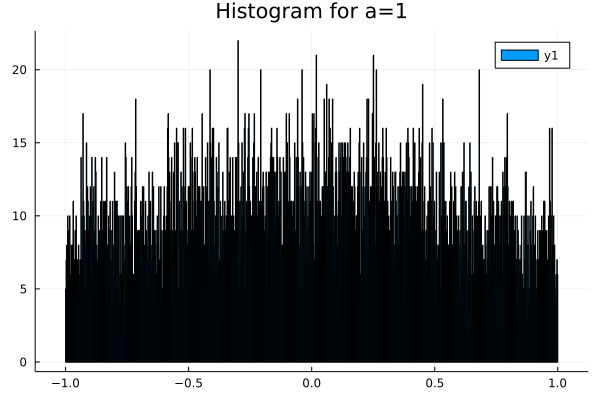

In [97]:
#ploting histogram distribution for a=1
histogram(sample_1,bins=1000,title="Histogram for a=1")

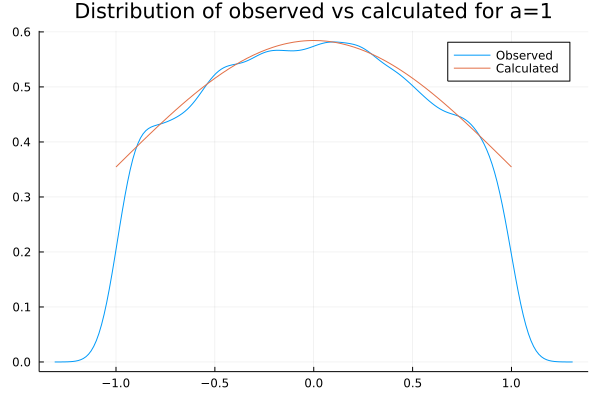

In [98]:
#Comparing Sample and expected distribution
density(sample_1,title="Distribution of observed vs calculated for a=1",label="Observed")
plot!(TruncatedNormal(0,1,-1,1),label="Calculated")

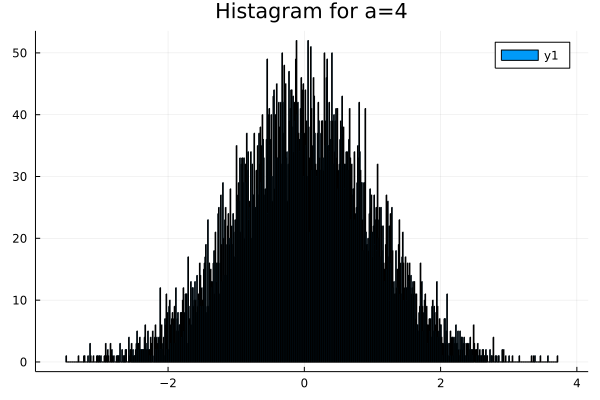

In [96]:
#Histogram density distribution for a=4
histogram(sample_4,bins=1000,title="Histagram for a=4")

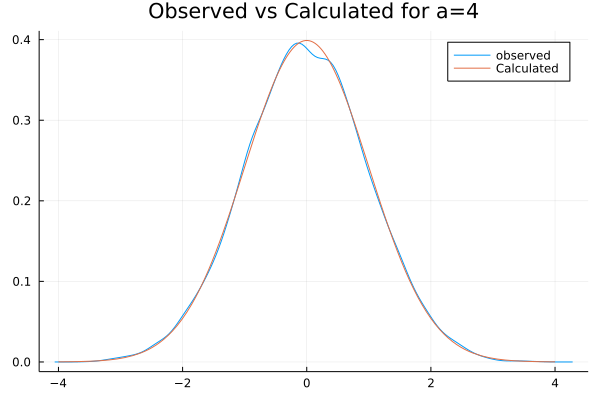

In [100]:
#Comparing sample and distribution
density(sample_4,title="Observed vs Calculated for a=4",label="observed")
plot!(TruncatedNormal(0,1,-4,4),label="Calculated")